In [ ]:
###STEP:1: SCRAPING OF REVIEWS FROM YOUTUBE USING SELENIUM AND CHROMEDRIVER

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")                             # The code is tweaked to wait for comments to be seen and loaded and not move ahead if it 
except:                                                                # # has'nt popped up. No wait time restriction give here
    print("⚠️ Comments section not found.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

while len(youtube_reviews) < max_comments:
    scroll_page()
    
    # Find and clean comments
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)

            if len(youtube_reviews) >= max_comments:
                break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")


In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from collections import OrderedDict
import time

# Step 1: Get inputs
video_url = input("Enter YouTube video URL: ")   #--------------------------Taking input of any youtube link from user
max_comments = int(input("Enter max number of comments to scrape: "))    #-----------------Since there are many comments user can set a limit to number of scrapes
chromedriver_path = "C:\\WebDriver\\chromedriver.exe"           # ------------------This path has been updated according to where Chromedriver is stored in my local disk


# Step 2: Setup Chrome
chrome_options = Options()                                         #----------------------This command allows us to visually see the simulation
# chrome_options.add_argument("--headless")                # Keep off for debugging   ------- Initially this command did not open the n=browser for us to see
chrome_options.add_argument("--disable-dev-shm-usage")         
chrome_options.add_argument("--no-sandbox")

service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 30)

# Step 3: Load video page
driver.get(video_url)

# Step 4: Wait for the comments section to fully load
try:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "ytd-comments")))
    print("✅ Comments section detected.")

    # Wait additionally for the actual comment elements to load
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "#content #content-text")))
    print("🟢 First comment block loaded.")
except:
    print("⚠️ Comments section not found or failed to load.")
    driver.quit()

# Step 5: Start scrolling and collecting
youtube_reviews = []
collected_texts = set()
scroll_pause_time = 4

def scroll_page():
    driver.execute_script("window.scrollBy(0, 2000);")
    time.sleep(scroll_pause_time)

no_growth_count = 0
last_count = 0
max_wait_cycles = 10  # avoid infinite loop if loading is too slow

while len(youtube_reviews) < max_comments and no_growth_count < max_wait_cycles:
    scroll_page()

    # Re-check that comment elements are loaded
    comments = driver.find_elements(By.CSS_SELECTOR, "#content #content-text")
    found_any_new = False

    for c in comments:
        comment_text = c.text.strip()
        if comment_text and comment_text not in collected_texts:
            youtube_reviews.append(comment_text)
            collected_texts.add(comment_text)
            found_any_new = True

        if len(youtube_reviews) >= max_comments:
            break

    print(f"⏳ Scraped {len(youtube_reviews)} / {max_comments} comments...")

    # Stop if no new comments appeared
    if len(youtube_reviews) == last_count:
        no_growth_count += 1
        print("⚠️ No new comments loaded, waiting again...")
    else:
        no_growth_count = 0  # reset growth counter

    last_count = len(youtube_reviews)

# Step 6: Clean up
driver.quit()
print(f"\n✅ Finished scraping {len(youtube_reviews)} comments!")

Enter YouTube video URL:  https://www.youtube.com/watch?v=F-eMt3SrfFU
Enter max number of comments to scrape:  100


✅ Comments section detected.
🟢 First comment block loaded.
⏳ Scraped 20 / 100 comments...
⏳ Scraped 40 / 100 comments...
⏳ Scraped 40 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 60 / 100 comments...
⏳ Scraped 60 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 80 / 100 comments...
⏳ Scraped 80 / 100 comments...
⚠️ No new comments loaded, waiting again...
⏳ Scraped 100 / 100 comments...

✅ Finished scraping 100 comments!


In [ ]:
#### STEP:2: WE WILL CHECK IF REVIEWS ARE SCRAPED  PROPERLY NOW

In [3]:
import pandas as pd

# Display scraped comments as a table
df_comments = pd.DataFrame(youtube_reviews[:max_comments], columns=["YouTube Comment"]) #----Put comments in a dataframe as a table and name it
df_comments.index += 1  # Start index from 1 instead of 0

# Show first 10 comments as a preview 
print("📝 Preview of scraped comments:")
display(df_comments.head(20))

# OR show the entire list (uncomment the next line if needed)
# display(df_comments) -----------------------------------------Excuting this would show all the reviews I choose to collect


📝 Preview of scraped comments:


,YouTube Comment
1,Dunkirk and 1917 makes you appreciate the life...
2,So many people have been complaining that Nola...
3,"You had me at ""from Christopher Nolan"""
4,Extremely raw and realistic picture of a war w...
5,Christopher Nolan with Hans Zimmer is a perfec...
6,Still believe Dunkirk is not just a movie.\n\n...
7,"The film: the horrors of war, and the bravery ..."
8,I watched this for the plot multiple times\n\n...
9,Watching this in IMAX and losing my hearing wa...
10,"As soon as ""Christopher Nolan"" popped up, I wa..."


In [ ]:
#### STEP:3: CLEANING AND PRE-PROCESSING THE SCRAPED COMMENTS

In [5]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')                                 #JOINING ALL COMMENTS INTO ONE LONG STRING

# Join all comments into one large string
ip_rev_string = " ".join(youtube_reviews)
ip_rev_string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Dunkirk and 1917 makes you appreciate the life we live today. We must never forget. They are both masterpieces and deserve all the recognition. So many people have been complaining that Nolan cast Harry Styles in this movie, but you\'ve got to remember: they also complained about him casting Heath Ledger as the Joker. What\'s my point? NEVER DOUBT NOLAN. You had me at "from Christopher Nolan" Extremely raw and realistic picture of a war which makes you feel you are there. Without unnecessary drama and individual heroism. Epic shots and music. This is why I adore Nolan. Christopher Nolan with Hans Zimmer is a perfect duo for a movie Tom hardy is just icing on the cake Still believe Dunkirk is not just a movie.\n\nIt\'s an experience. The film: the horrors of war, and the bravery and heroism that both the soldiers and civilians of the UK showed at Dunkirk.\n\nThe comments: OMG HARRY STYLES I watched this for the plot multiple times\n\nThe plot: Cillian Murphy Watching this in IMAX and l

In [7]:
# Clean text
ip_rev_string = re.sub("[^A-Za-z]+", " ", ip_rev_string).lower()       #REMOVING SPL CHARACTERS ,DIGITS,SPACES AND MAKING LOWERCASE.ip_rev_string
                                                                     #Consists of string of words from Youtube comments without stopwords removed

In [9]:
ip_revi_words = ip_rev_string.split()                   
print(ip_revi_words[:50])                                         #SPLITTING THE STRING INTO SENSIBLE induvidual WORDS USING ".spilt" from NLTK

['dunkirk', 'and', 'makes', 'you', 'appreciate', 'the', 'life', 'we', 'live', 'today', 'we', 'must', 'never', 'forget', 'they', 'are', 'both', 'masterpieces', 'and', 'deserve', 'all', 'the', 'recognition', 'so', 'many', 'people', 'have', 'been', 'complaining', 'that', 'nolan', 'cast', 'harry', 'styles', 'in', 'this', 'movie', 'but', 'you', 've', 'got', 'to', 'remember', 'they', 'also', 'complained', 'about', 'him', 'casting', 'heath']


In [17]:
# Load stopwords and extend slightly (generic, not product-specific)
stop_words = stopwords.words('english')
stop_words.extend(["youtube", "video", "product", "review", "subscribe","one", "channel","movie","trailer","cilian","cillian","imax","rdj","christopher","oppenheimer","cillian murphy","christopher nolan","nolan","murphy","christian bale","christian","harry","harry styles","styles","michael","heath","heath ledger","joker","hans","hans zimmer","dunkirk","tommy","shelby","hardy","tom","ledger","zimmer"])  #-------CAN ADD WORDS TO CUSTOM STOPWORDS 

# Remove stopwords
ip_reviews_words = [w for w in ip_revi_words if w not in stop_words and w != ""] #Conversion to a list of stopwords removed collection

# Preview
print("✅ Total cleaned words:", len(ip_reviews_words))
print("🧾 Sample cleaned words:", ip_reviews_words[:50]) #----------DISPLAYING A SAMPLE OF 50 CLEANED WORDS FROM THE REVIEW WORDS


✅ Total cleaned words: 1460
🧾 Sample cleaned words: ['makes', 'appreciate', 'life', 'live', 'today', 'must', 'never', 'forget', 'masterpieces', 'deserve', 'recognition', 'many', 'people', 'complaining', 'cast', 'got', 'remember', 'also', 'complained', 'casting', 'point', 'never', 'doubt', 'extremely', 'raw', 'realistic', 'picture', 'war', 'makes', 'feel', 'without', 'unnecessary', 'drama', 'individual', 'heroism', 'epic', 'shots', 'music', 'adore', 'perfect', 'duo', 'icing', 'cake', 'still', 'believe', 'experience', 'film', 'horrors', 'war', 'bravery']


In [ ]:
#### CREATING A WORD CLOUD WITH THE TOKENISED CLEANED WORDS FROM OUR SCRAPED REVIEWS

In [19]:
ip_rev_string = " ".join(ip_reviews_words)            # REJOINING CLEANED WORDS INTO A SINGLE STRING TO MAKE A WORD CLOUD
ip_rev_string                                         #Redefining "ip_rev_string" to have a string of all COMPLETELY CLEANED WORDS"(stopwords removed)

'makes appreciate life live today must never forget masterpieces deserve recognition many people complaining cast got remember also complained casting point never doubt extremely raw realistic picture war makes feel without unnecessary drama individual heroism epic shots music adore perfect duo icing cake still believe experience film horrors war bravery heroism soldiers civilians uk showed comments omg watched plot multiple times plot watching losing hearing definitely worth soon popped sold grandfather said care happened already accepted dead man standing beach might well live every minute like said cup tea corned beef sandwich gave landed british soil always finest meal ever eaten came came fookin gonna mention good score parents describing went school excited making new film alone enough make want see film absolutely brutal watch every time get little glimmers hope main characters end swallowed crushing despair due situations later find would definitely recommend honestly care star

In [ ]:
#NOTE:

## THE FIRST CLEANING REMOVED ALL DIGITS,SPACES,SPL CHAR,MADE LOWERCASE AND WAS STILL A DOCUMENT WITH ONE LONG STRING
## THEN I SPLIT IT INTO WORDS--------LEADING TO "ip_revi_words"(contains stop words)
## THEN I DEFINED STOPWORDS AND REMOVED THEM TO FURTHER CLEAN IT-------LEADING TO "ip_reviews_words"(does not contain stopwords)

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


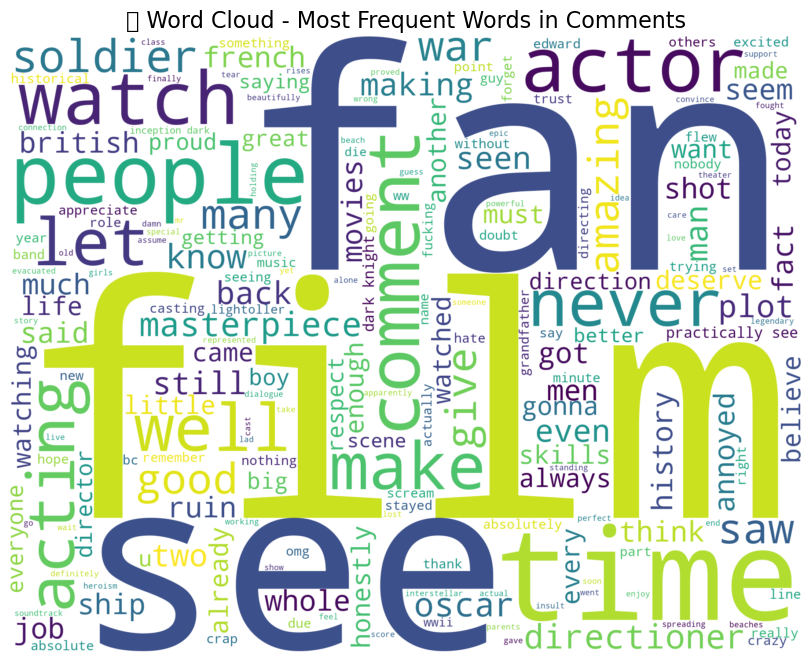

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(
    background_color='white',
    width=1800,                                   # WORDCLOUD GENERATION FOR CLEANED WORDS IN MY COMMENTS
    height=1400
).generate(ip_rev_string)                         #The ".generate" function demands a single document of words(string) seperated by " ".

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🌀 Word Cloud - Most Frequent Words in Comments", fontsize=16)
plt.show()


In [ ]:
#### USING 'TEXTBLOB' LIBRARY FOR SENTIMENT CLASSIFICATION OF CLEANED WORDS TO POSSITIVE AND NEGATIVE

In [23]:
!pip install textblob

In [25]:
from textblob import download_corpora
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\abmag\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is alr

In [27]:
from textblob import TextBlob

def analyze_sentiments_in_string(text):              #--------Defining a function to judge sentiment of words(+,- or neutral) using textblob
    # Tokenize words using TextBlob
    words = TextBlob(text).words

    # Analyze polarity of each word
    sentiments = {word: TextBlob(word).sentiment.polarity for word in words}

    # Split into positive and negative
    positive_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment > 0} # Classifying words with >0 score in here as +ive
    negative_words = {word: sentiment for word, sentiment in sentiments.items() if sentiment < 0} # Classifying words with <0 score in here as -ive

    return positive_words, negative_words

# Run it on your cleaned string
positive_words, negative_words = analyze_sentiments_in_string(ip_rev_string)  # Calling the function to act on our "Cleaned Words" which have a sentiment
                                                                              # score possibly attached to them
# Show results
print(f"✅ Found {len(positive_words)} positive words")
print(f"✅ Found {len(negative_words)} negative words")

# Preview few words
print("\nPositive Sample:", list(positive_words.items())[:10])
print("Negative Sample:", list(negative_words.items())[:10])


✅ Found 82 positive words
✅ Found 47 negative words

Positive Sample: [('live', 0.13636363636363635), ('many', 0.5), ('realistic', 0.16666666666666666), ('epic', 0.1), ('perfect', 1.0), ('worth', 0.3), ('good', 0.7), ('excited', 0.375), ('new', 0.13636363636363635), ('absolutely', 0.2)]
Negative Sample: [('complained', -0.3), ('extremely', -0.125), ('raw', -0.23076923076923078), ('unnecessary', -0.4), ('dead', -0.2), ('brutal', -0.875), ('little', -0.1875), ('due', -0.125), ('crap', -0.8), ('trapped', -0.2)]


In [ ]:
#### POSITIVE AND NEGATIVE WORDS WORD-CLOUD-------PURELY BASED ON WORDS WHICH ALIGN WITH DICTIONARY AND NOT CONTEXT

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128154 (\N{GREEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


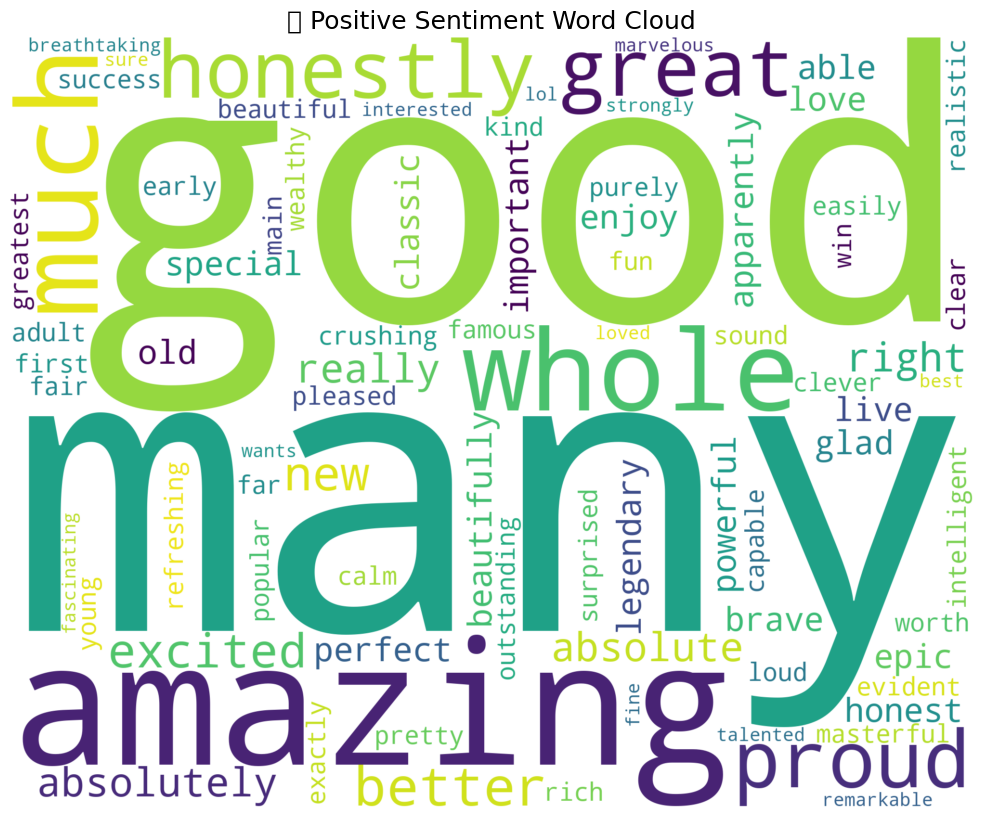

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


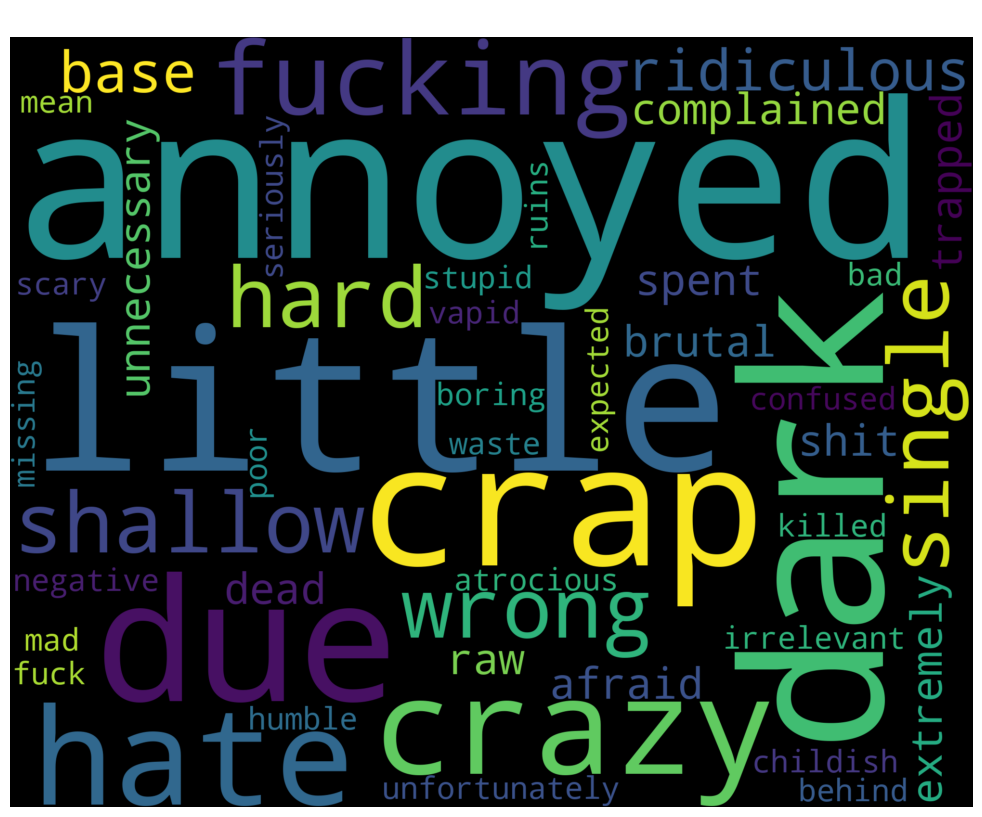

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Extract positive and negative words from cleaned list
ip_pos_in_pos = " ".join([w for w in ip_reviews_words if w in positive_words])
ip_neg_in_neg = " ".join([w for w in ip_reviews_words if w in negative_words])

# Step 2: Generate Positive Word Cloud
wordcloud_pos = WordCloud(
    background_color='white',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_pos_in_pos)

# Step 3: Display Positive Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("💚 Positive Sentiment Word Cloud", fontsize=18)
plt.show()

# Step 4: Generate Negative Word Cloud
wordcloud_neg = WordCloud(
    background_color='black',
    width=2000,
    height=1600,
    max_words=500
).generate(ip_neg_in_neg)

# Step 5: Display Negative Word Cloud
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("💔 Negative Sentiment Word Cloud", fontsize=18, color='white')
plt.show()


In [ ]:
#### CREATION OF BI-GRAMS WITH CLEANED WORDS IN REVIEWS BUT STOPWORDS STILL KEPT

In [31]:
from nltk.util import ngrams

# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords = [word for word in ip_revi_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list = list(ngrams(tokens_with_stopwords, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases = [' '.join(pair) for pair in bigrams_list]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases)}")
print("\n📋 Sample bi-grams:")
for i, bigram in enumerate(bigram_phrases[:50]):
    print(f"{i+1}. {bigram}")



✅ Total bi-grams generated: 3675

📋 Sample bi-grams:
1. dunkirk and
2. and makes
3. makes you
4. you appreciate
5. appreciate the
6. the life
7. life we
8. we live
9. live today
10. today we
11. we must
12. must never
13. never forget
14. forget they
15. they are
16. are both
17. both masterpieces
18. masterpieces and
19. and deserve
20. deserve all
21. all the
22. the recognition
23. recognition so
24. so many
25. many people
26. people have
27. have been
28. been complaining
29. complaining that
30. that nolan
31. nolan cast
32. cast harry
33. harry styles
34. styles in
35. in this
36. this movie
37. movie but
38. but you
39. you ve
40. ve got
41. got to
42. to remember
43. remember they
44. they also
45. also complained
46. complained about
47. about him
48. him casting
49. casting heath
50. heath ledger


In [ ]:
#### BI-GRAMS WORD CLOUD TO SEE MOST REPEATING PHRASES------I ALREADY HAVE THE PHRASES---NEED TO JUST PROCESS THEM
#### HENCE I AM USING "COUNTER" INSTEAD OF COUNT VECTORISER"

C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


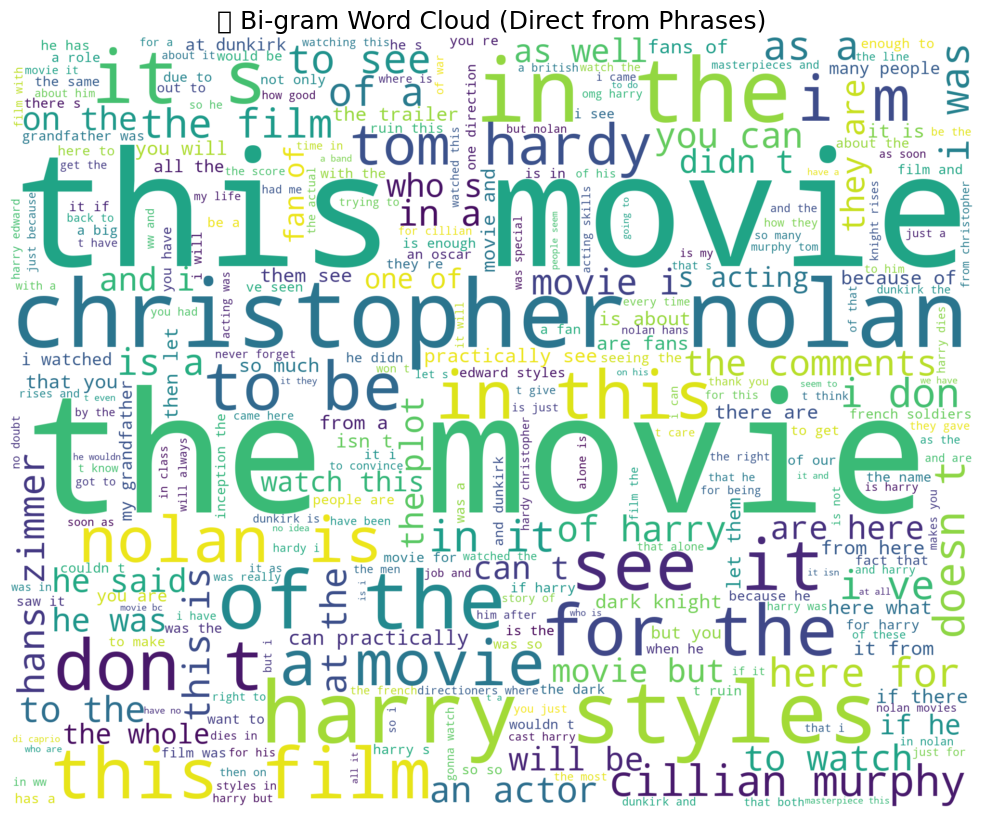

In [33]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Count bi-gram frequencies
bigram_counts = Counter(bigram_phrases)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud (Direct from Phrases)", fontsize=18)
plt.show()



In [ ]:
###LIST OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

In [35]:
# Step 1: Remove empty or whitespace-only tokens
tokens_with_stopwords1 = [word for word in ip_reviews_words if word.strip() != ""]

# Step 2: Generate bi-grams
bigrams_list1 = list(ngrams(tokens_with_stopwords1, 2))

# Step 3: Convert tuple bi-grams to strings
bigram_phrases1 = [' '.join(pair) for pair in bigrams_list1]

# Step 4: Display results
print(f"✅ Total bi-grams generated: {len(bigram_phrases1)}")
print("\n📋 Sample bi-grams:")
for i, bigram2 in enumerate(bigram_phrases1[:50]):
    print(f"{i+1}. {bigram2}")


✅ Total bi-grams generated: 1459

📋 Sample bi-grams:
1. makes appreciate
2. appreciate life
3. life live
4. live today
5. today must
6. must never
7. never forget
8. forget masterpieces
9. masterpieces deserve
10. deserve recognition
11. recognition many
12. many people
13. people complaining
14. complaining cast
15. cast got
16. got remember
17. remember also
18. also complained
19. complained casting
20. casting point
21. point never
22. never doubt
23. doubt extremely
24. extremely raw
25. raw realistic
26. realistic picture
27. picture war
28. war makes
29. makes feel
30. feel without
31. without unnecessary
32. unnecessary drama
33. drama individual
34. individual heroism
35. heroism epic
36. epic shots
37. shots music
38. music adore
39. adore perfect
40. perfect duo
41. duo icing
42. icing cake
43. cake still
44. still believe
45. believe experience
46. experience film
47. film horrors
48. horrors war
49. war bravery
50. bravery heroism


C:\Users\abmag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


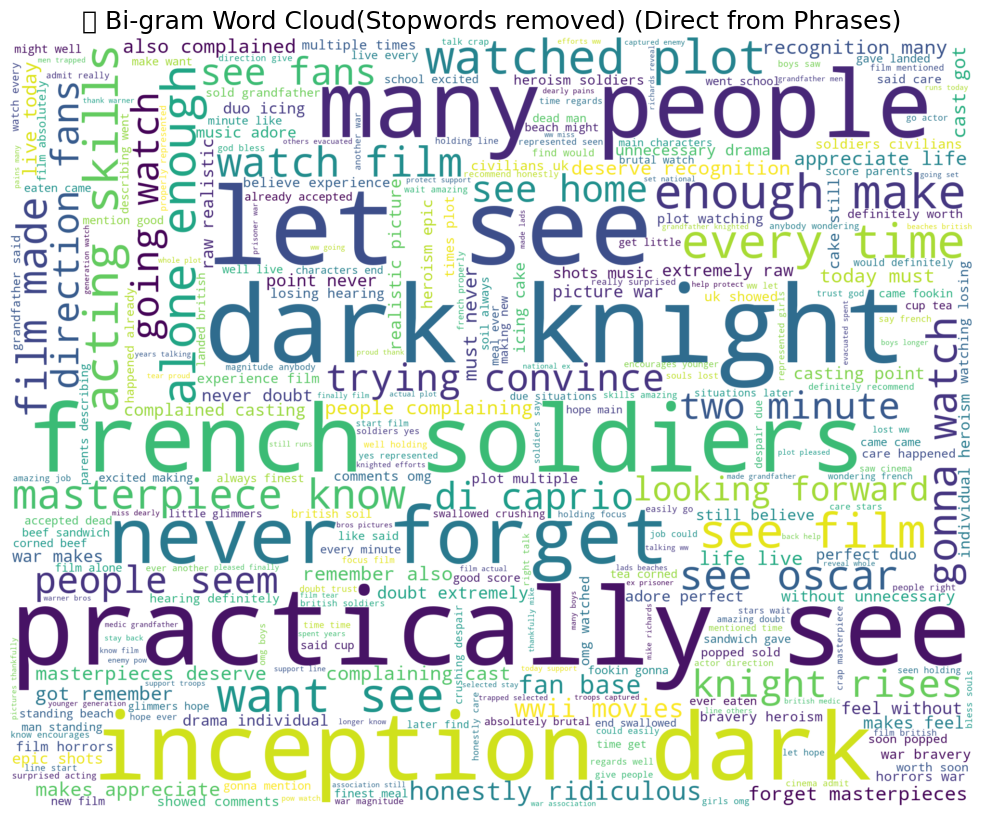

In [37]:
### WORDCLOUD OF BI-GRAMS WHEN STOPWORDS ARE REMOVED

# Step 1: Count bi-gram frequencies
bigram_counts1 = Counter(bigram_phrases1)

# Step 2: Generate WordCloud from the Counter
bigram_wordcloud1 = WordCloud(
    width=2000,
    height=1600,
    background_color='white',
    max_words=300
).generate_from_frequencies(bigram_counts1)

# Step 3: Display
plt.figure(figsize=(14, 10))
plt.imshow(bigram_wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("🔗 Bi-gram Word Cloud(Stopwords removed) (Direct from Phrases)", fontsize=18)
plt.show()


In [ ]:
#####
#####
#####      SENTIMENT SUMMARY AND EMOTION DISTRIBUTION USING "NRC EMOTION LEXICON"
#####
#####

In [39]:
import pandas as pd

# Define the path to the downloaded lexicon file
nrc_lexicon_path = 'D:/Rishi/JINDAL Academics/Term 5 Subjects/Social Media Analytics/Final Project/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Load the lexicon into a DataFrame
nrc_df = pd.read_csv(nrc_lexicon_path, sep='\t', header=None, names=['word', 'emotion', 'association'])

# Filter out rows where association is 0
nrc_df = nrc_df[nrc_df['association'] == 1]

# Pivot the DataFrame to have words as index and emotions as columns
nrc_pivot = nrc_df.pivot(index='word', columns='emotion', values='association').fillna(0)

# Display the first few rows of the pivoted DataFrame
print(nrc_pivot.head())


emotion      anger  anticipation  disgust  fear  joy  negative  positive  \
word                                                                       
abacus         0.0           0.0      0.0   0.0  0.0       0.0       0.0   
abandon        0.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandoned      1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abandonment    1.0           0.0      0.0   1.0  0.0       1.0       0.0   
abba           0.0           0.0      0.0   0.0  0.0       0.0       1.0   

emotion      sadness  surprise  trust  
word                                   
abacus           0.0       0.0    1.0  
abandon          1.0       0.0    0.0  
abandoned        1.0       0.0    0.0  
abandonment      1.0       1.0    0.0  
abba             0.0       0.0    0.0  


In [ ]:
ip_reviews_words  # These are the words cleaned completelely(Even stopwords removed)

In [ ]:
### WE will now try to associate these words from Youtube comments with NRC Emotion Lexicon

In [41]:
from collections import Counter

def analyze_emotions(comments, nrc_pivot):
    # Initialize a counter for emotions
    emotion_counter = Counter()

    # Iterate over each word in the comments
    for word in comments:
        if word in nrc_pivot.index:
            # Add the emotions associated with the word
            emotion_counter.update(nrc_pivot.loc[word][nrc_pivot.loc[word] > 0].index)

    return emotion_counter

# Assuming 'ip_reviews_words' is your list of cleaned words from YouTube comments
emotion_counts = analyze_emotions(ip_reviews_words, nrc_pivot)

# Display the emotion counts
print(emotion_counts)

Counter({'positive': 173, 'negative': 106, 'anticipation': 100, 'trust': 99, 'joy': 84, 'fear': 75, 'anger': 56, 'sadness': 55, 'surprise': 46, 'disgust': 43})


In [ ]:
##Above output denotes number of words in our corpus which are associated with "Emotions"-----We get overall emotion distribution
## in our corpus

# Visualize the Emotion Distribution

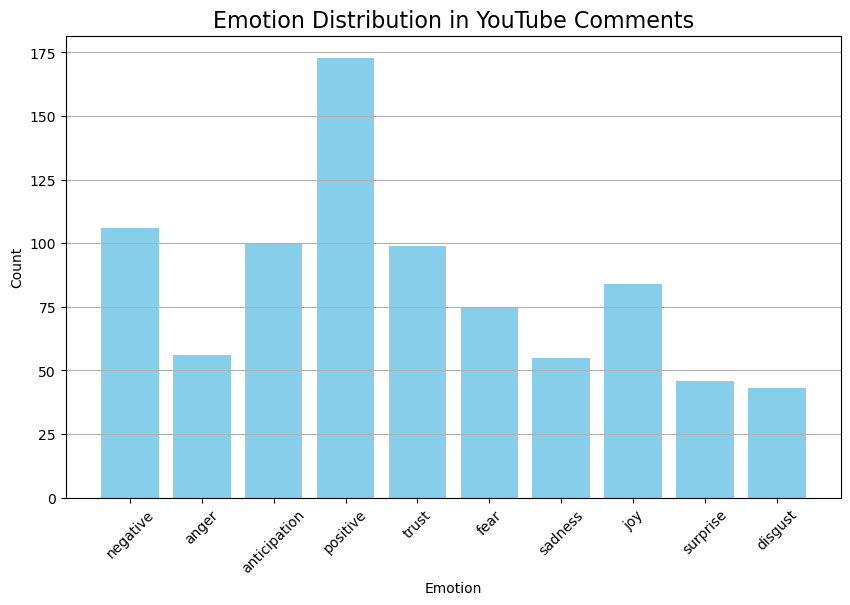

In [43]:
# Plot the emotion distribution
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.keys(), emotion_counts.values(), color='skyblue')
plt.title("Emotion Distribution in YouTube Comments", fontsize=16)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [ ]:
### Performing Different Activities like Senti Analysis(as a whole), Topic Modelling, Text Summarisation, Keyword extraction
### Named Entity Recognition

In [45]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy


In [47]:

def analyze_sentiment(text):
    return TextBlob(text).sentiment

def topic_modeling(docs, num_topics=5):
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(docs)
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
    lda.fit(doc_term_matrix)
    return lda, vectorizer.get_feature_names_out()

def extract_keywords(docs, num_keywords=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(docs)
    feature_array = vectorizer.get_feature_names_out()
    
    # Compute average TF-IDF score across all documents
    tfidf_scores = tfidf_matrix.mean(axis=0).A1  # .A1 flattens the sparse matrix
    sorted_indices = tfidf_scores.argsort()[::-1]
    
    # Get top N keywords
    top_keywords = feature_array[sorted_indices][:num_keywords]
    return top_keywords

def named_entity_recognition(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]
    return ' '.join(words)


In [49]:
##Topic Modelling

# Run topic modeling on the raw comment list
lda_model, feature_names = topic_modeling(youtube_reviews, num_topics=5)

# Display the top 10 words per topic
print("🧠 Topics discovered:")
for idx, topic in enumerate(lda_model.components_):
    print(f"\n🔹 Topic {idx+1}:")
    top_words_indices = topic.argsort()[:-11:-1]  # Top 10 words
    top_words = [feature_names[i] for i in top_words_indices]
    print(", ".join(top_words))


🧠 Topics discovered:

🔹 Topic 1:
movie, harry, fans, styles, fan, let, just, people, time, nolan

🔹 Topic 2:
film, harry, dunkirk, nolan, know, saw, watch, today, ww2, knight

🔹 Topic 3:
movie, nolan, oscar, ve, dunkirk, came, movies, men, lightoller, ship

🔹 Topic 4:
harry, movie, film, time, trailer, styles, acting, good, dunkirk, honestly

🔹 Topic 5:
nolan, movie, christopher, just, hardy, zimmer, cillian, harry, people, tom


In [ ]:
###TD-IDF---TF-IDF stands for Term Frequency–Inverse Document Frequency.
### It helps you find: 1) Important words in a document , 2) Based on how frequently they appear in one doc, 3)And how rare they are across all docs

In [51]:
# Extract top N keywords from all YouTube comments
top_keywords = extract_keywords(youtube_reviews, num_keywords=10)

# Display result
print("🔑 Top Keywords (TF-IDF Based):")
for i, kw in enumerate(top_keywords, 1):
    print(f"{i}. {kw}")


🔑 Top Keywords (TF-IDF Based):
1. nolan
2. movie
3. harry
4. christopher
5. film
6. styles
7. just
8. oscar
9. practically
10. hardy


In [ ]:
### Named Entity Recognition:(NER)-------
#It extracts real-world objects from text---Helps Identify Real life Person, Organisation and Products being discussed in comments.

In [53]:
youtube_reviews_string = " ".join(youtube_reviews)

In [55]:
nlp = spacy.load("en_core_web_sm")  # Load spaCy's small English model

In [57]:
# Run Named Entity Recognition
entities = named_entity_recognition(youtube_reviews_string)

# Display all recognized entities grouped by type
from collections import defaultdict
entity_dict = defaultdict(list)

for text, label in entities:
    entity_dict[label].append(text)

# Print sample results
print("🧠 Named Entities Found:\n")
for label, values in entity_dict.items():
    print(f"{label} ({len(values)}):")
    print(", ".join(set(values[:10])))  # show up to 10 unique entities
    print("-----")


🧠 Named Entities Found:

ORG (50):
MASTERPIECE, Dunkirk, Tommy, Nolan
-----
DATE (13):
only a few months, today, the 1980s, 1940, this year, years, 1917, 16 years old
-----
PERSON (109):
Harry Styles, Tom, Heath Ledger, Hans Zimmer, Christopher Nolan", Nolan, Christopher Nolan, Cillian Murphy, Joker
-----
GPE (6):
England, WWI, UK, LEGENDARY, Duxford, Memento
-----
NORP (15):
British, cillian, French, Cillian
-----
PERCENT (9):
99.5%, 95%, 30 %, 99.9%, 50 %, 0.1%, 0.5%, 20 %
-----
CARDINAL (25):
338,000, Fifty, 2, ten, one, 30,000, thousands, 3, 1
-----
WORK_OF_ART (5):
Love, Home, Oscar
-----
MONEY (1):
1
-----
TIME (3):
each night, two minute
-----
PRODUCT (1):
Masterpiece
-----
ORDINAL (2):
first, second
-----
EVENT (3):
WWII
-----
LANGUAGE (1):
English
-----
LOC (1):
Zimmer
-----


In [ ]:
### I Dont find the results of NER to be very ideal and sensible